In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 64.8 MB/s eta 0:00:00


In [2]:
import gensim
from gensim.models import Word2Vec
import numpy as np

In [3]:
sentences= [
    "king is a strong man",
    "queen is a wise woman",
    "boy is a young man",
    "girl is a young woman",
    "prince is a young king",
    "princess is a young queen"
]
tokenized_sentences = [sentence.split() for sentence in sentences]
tokenized_sentences

[['king', 'is', 'a', 'strong', 'man'],
 ['queen', 'is', 'a', 'wise', 'woman'],
 ['boy', 'is', 'a', 'young', 'man'],
 ['girl', 'is', 'a', 'young', 'woman'],
 ['prince', 'is', 'a', 'young', 'king'],
 ['princess', 'is', 'a', 'young', 'queen']]

In [4]:
model = Word2Vec (
    sentences= tokenized_sentences,
    vector_size=100,
    window=2,
    min_count=1,
    sg=0,
    workers=2 ,
    epochs=100

)

In [5]:
model.wv["king"]

array([ 8.0581671e-03, -4.4204500e-03, -1.0876129e-03,  1.1190576e-03,
       -1.7341670e-04,  1.0898832e-03,  6.1708917e-03,  9.7197866e-05,
       -3.3490381e-03, -1.5622011e-03,  5.9869736e-03,  1.4620994e-03,
       -6.8368285e-04,  9.3827974e-03, -4.8756823e-03, -8.3146791e-04,
        9.2913024e-03,  6.7611123e-03,  1.3907340e-03, -9.0141231e-03,
        1.1692082e-03, -2.2621183e-03,  9.4766682e-03,  1.1583131e-03,
        1.5871091e-03,  2.3716665e-03, -1.8397912e-03, -4.9179113e-03,
        1.5842536e-04, -2.0459432e-03,  6.6889869e-03,  8.9033879e-03,
       -6.4921594e-04,  2.9849657e-03, -6.1997916e-03,  1.7688893e-03,
       -6.8493150e-03, -8.7035736e-03, -5.9090513e-03, -8.9657353e-03,
        7.2687957e-03, -5.7148286e-03,  8.2304906e-03, -7.2895200e-03,
        3.4645998e-03,  9.7540747e-03, -7.8375302e-03, -9.9040577e-03,
       -4.3377019e-03, -2.6208449e-03, -2.6820833e-04, -8.8328347e-03,
       -8.7394156e-03,  2.7789539e-03, -8.2296859e-03, -9.1757327e-03,
      

In [6]:
model.wv.similarity("king", "queen")

np.float32(0.03607034)

In [7]:
model.wv.similarity("king", "man")

np.float32(0.022505362)

In [8]:
model.wv.similarity("king","girl")

np.float32(0.011991441)

In [9]:
model.wv.most_similar("king")

[('young', 0.15657538175582886),
 ('woman', 0.05044597387313843),
 ('boy', 0.05027696490287781),
 ('queen', 0.03607034310698509),
 ('a', 0.030954521149396896),
 ('man', 0.02250535599887371),
 ('prince', 0.01852380856871605),
 ('girl', 0.011991444043815136),
 ('princess', 0.006415855139493942),
 ('strong', 0.0019157830392941833)]

In [10]:
model.wv.most_similar(
    positive=["king", "woman"],
    negative=["man"]
)

[('strong', 0.0856289267539978),
 ('young', 0.060642387717962265),
 ('princess', 0.03174930810928345),
 ('prince', 0.02893919125199318),
 ('boy', 0.0281208585947752),
 ('a', 0.004242875147610903),
 ('is', -0.01951063983142376),
 ('girl', -0.025118377059698105),
 ('queen', -0.08481679111719131),
 ('wise', -0.11874482035636902)]

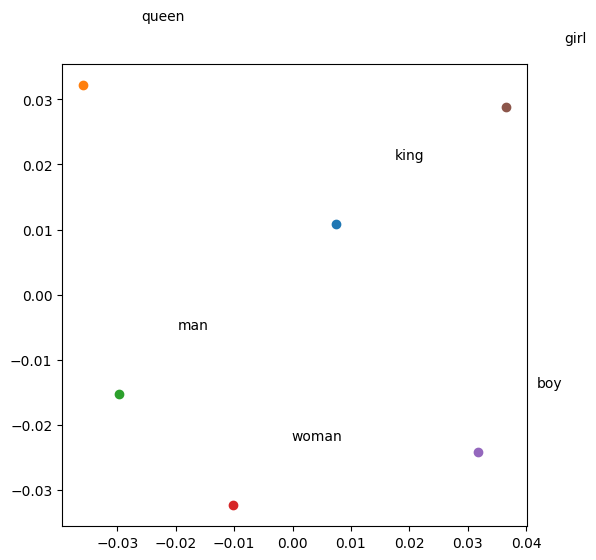

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["king", "queen", "man", "woman", "boy", "girl"]
vectors = np.array([model.wv[word] for word in words])

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(6,6))
for i, word in enumerate(words):
    plt.scatter(reduced[i,0], reduced[i,1])
    plt.text(reduced[i,0]+0.01, reduced[i,1]+0.01, word)
plt.show()